In [1]:
!pip install pandas matplotlib seaborn openpyxl streamlit fpdf2 python-docx


In [2]:
import pandas as pd

# Load the sample Excel file
file_path = 'sample_data/business_data.xlsx'
df = pd.read_excel(file_path)

# Show first few rows
df.head()


,Date,Product,Category,Customer,Quantity,Unit Price,Total Sale
0,2024-01-01,Widget A,Tools,John Doe,3,20,60
1,2024-01-02,Widget B,Tools,Jane Smith,2,50,100
2,2024-01-03,Widget A,Tools,Mike Johnson,5,20,100
3,2024-01-04,Widget C,Tools,John Doe,1,100,100


In [3]:
def generate_summary(df):
    summary = {}

    summary['Total Sales'] = df['Total Sale'].sum()
    summary['Total Customers'] = df['Customer'].nunique()
    summary['Top Customer'] = df.groupby('Customer')['Total Sale'].sum().idxmax()
    summary['Top Product'] = df.groupby('Product')['Total Sale'].sum().idxmax()

    return summary

# Run the summary function
business_summary = generate_summary(df)
business_summary


{'Total Sales': 360,
 'Total Customers': 3,
 'Top Customer': 'John Doe',
 'Top Product': 'Widget A'}

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve chart look
sns.set(style="whitegrid")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create output folder if not exists
import os
os.makedirs("output", exist_ok=True)


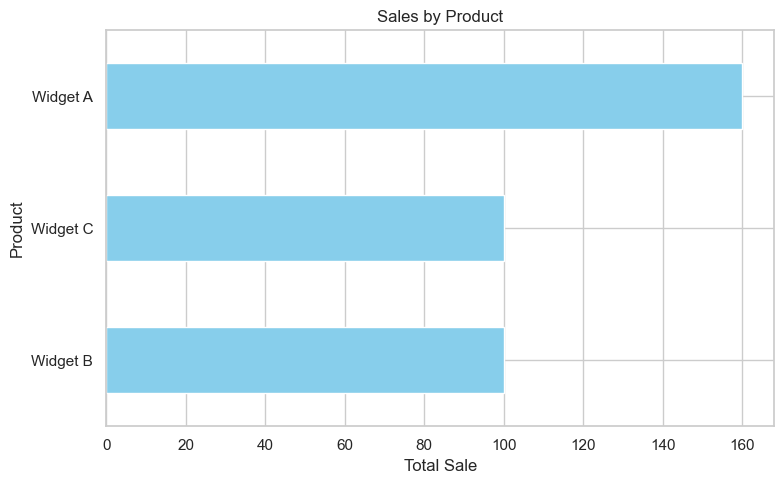

In [5]:
plt.figure(figsize=(8, 5))
product_sales = df.groupby('Product')['Total Sale'].sum().sort_values()
product_sales.plot(kind='barh', color='skyblue')
plt.title('Sales by Product')
plt.xlabel('Total Sale')
plt.tight_layout()
plt.savefig('output/sales_by_product.png')
plt.show()


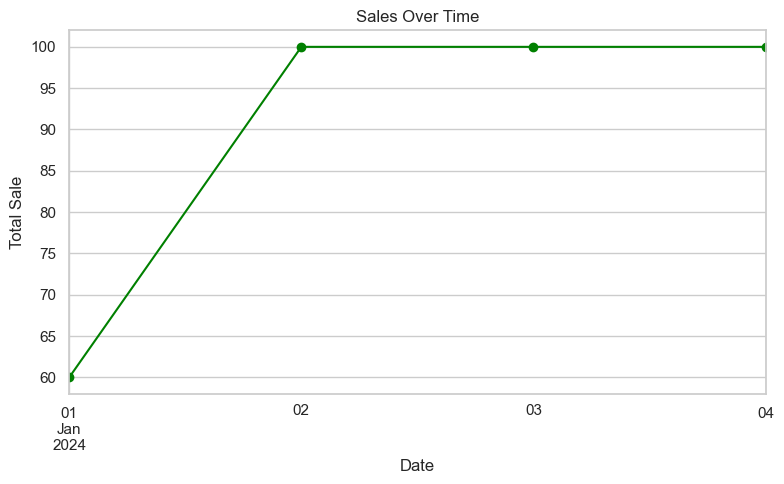

In [6]:
plt.figure(figsize=(8, 5))
time_sales = df.groupby('Date')['Total Sale'].sum()
time_sales.plot(marker='o', color='green')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sale')
plt.tight_layout()
plt.savefig('output/sales_over_time.png')
plt.show()


In [7]:
!pip install fpdf2


In [28]:
from fpdf import FPDF
from fpdf.enums import XPos, YPos  # Required for new_x, new_y

def export_pdf(summary_dict, output_path="output/business_report.pdf"):
    pdf = FPDF()
    pdf.add_page()

    # Title
    pdf.set_font("Helvetica", "B", 16)
    pdf.cell(w=0, h=10, text="Business Summary Report", new_x=XPos.LMARGIN, new_y=YPos.NEXT, align="C")

    pdf.set_font("Helvetica", size=12)
    pdf.ln(10)

    # Summary Content
    for key, value in summary_dict.items():
        line = f"{key.replace('_', ' ').title()}: {value}"
        pdf.cell(w=0, h=10, text=line, new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    pdf.ln(5)
    pdf.set_font("Helvetica", "B", 12)
    pdf.cell(w=0, h=10, text="Charts Attached Below:", new_x=XPos.LMARGIN, new_y=YPos.NEXT)

    # Insert Charts
    if os.path.exists("output/sales_by_product.png"):
        pdf.image("output/sales_by_product.png", w=180)
    if os.path.exists("output/sales_over_time.png"):
        pdf.image("output/sales_over_time.png", w=180)

    # Save PDF
    pdf.output(output_path)
    print(f"✅ PDF saved to: {output_path}")


In [29]:
export_pdf(business_summary)


✅ PDF saved to: output/business_report.pdf
